The solution code is divided into the following sections:

Data understanding

Preprocessing

EDA

Handle missing values

Feature Engineering

Building different types of classification model to detect credit card fraud

Handling Class Imbalance using Weight of class and SMOTE and ADASYN

Baseline Model building

Cross validation

Hyperparameter tuning

Model Evaluation

Model Selection

Model 2 - Identifying Strong Predictors of churn (Important features)

Model building Hyperparameter tuning with Cross Validation Model Evaluation Strategy 
recommendation to manage Credit Card fraud

## Importing All The Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import roc_curve, auc

## 1. Reading And UnderStanding The Data

In [9]:
data=pd.read_csv('creditcard.csv')

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
data.shape

(284807, 31)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
print("Total Amount Fraud occur is ",data[data['Class']==1].Amount.sum())

Total Amount Fraud occur is  60127.97


In [15]:
#Get percentage fradulent information
not_fraud=data[data['Class']==0].shape[0]
fraud=data[data['Class']==1].shape[0]
total=fraud+not_fraud

print("Percentage of Fradulent transaction: {}".format(np.round(100*fraud/total,4)))
print("Percentage of Non Fradulent transaction: {}".format(np.round(100*not_fraud/total,4)))

Percentage of Fradulent transaction: 0.1727
Percentage of Non Fradulent transaction: 99.8273


In [16]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

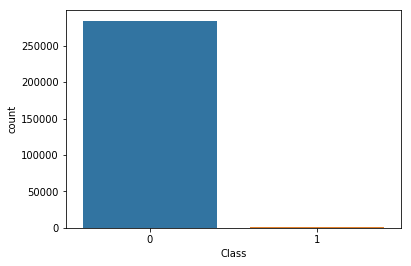

In [17]:
sns.countplot(x='Class', data=data)

The data is highly imbalance

## Checking Null Values For EDA

In [18]:
null_value_table=pd.DataFrame((data.isna().sum()/data.shape[0])*100).sort_values(0,ascending=False )
null_value_table.columns=['null percentage']
null_value_table[null_value_table['null percentage']>0]

,null percentage


There are no null values in the dataset.

## Checking Skewness Of the Numerical Data

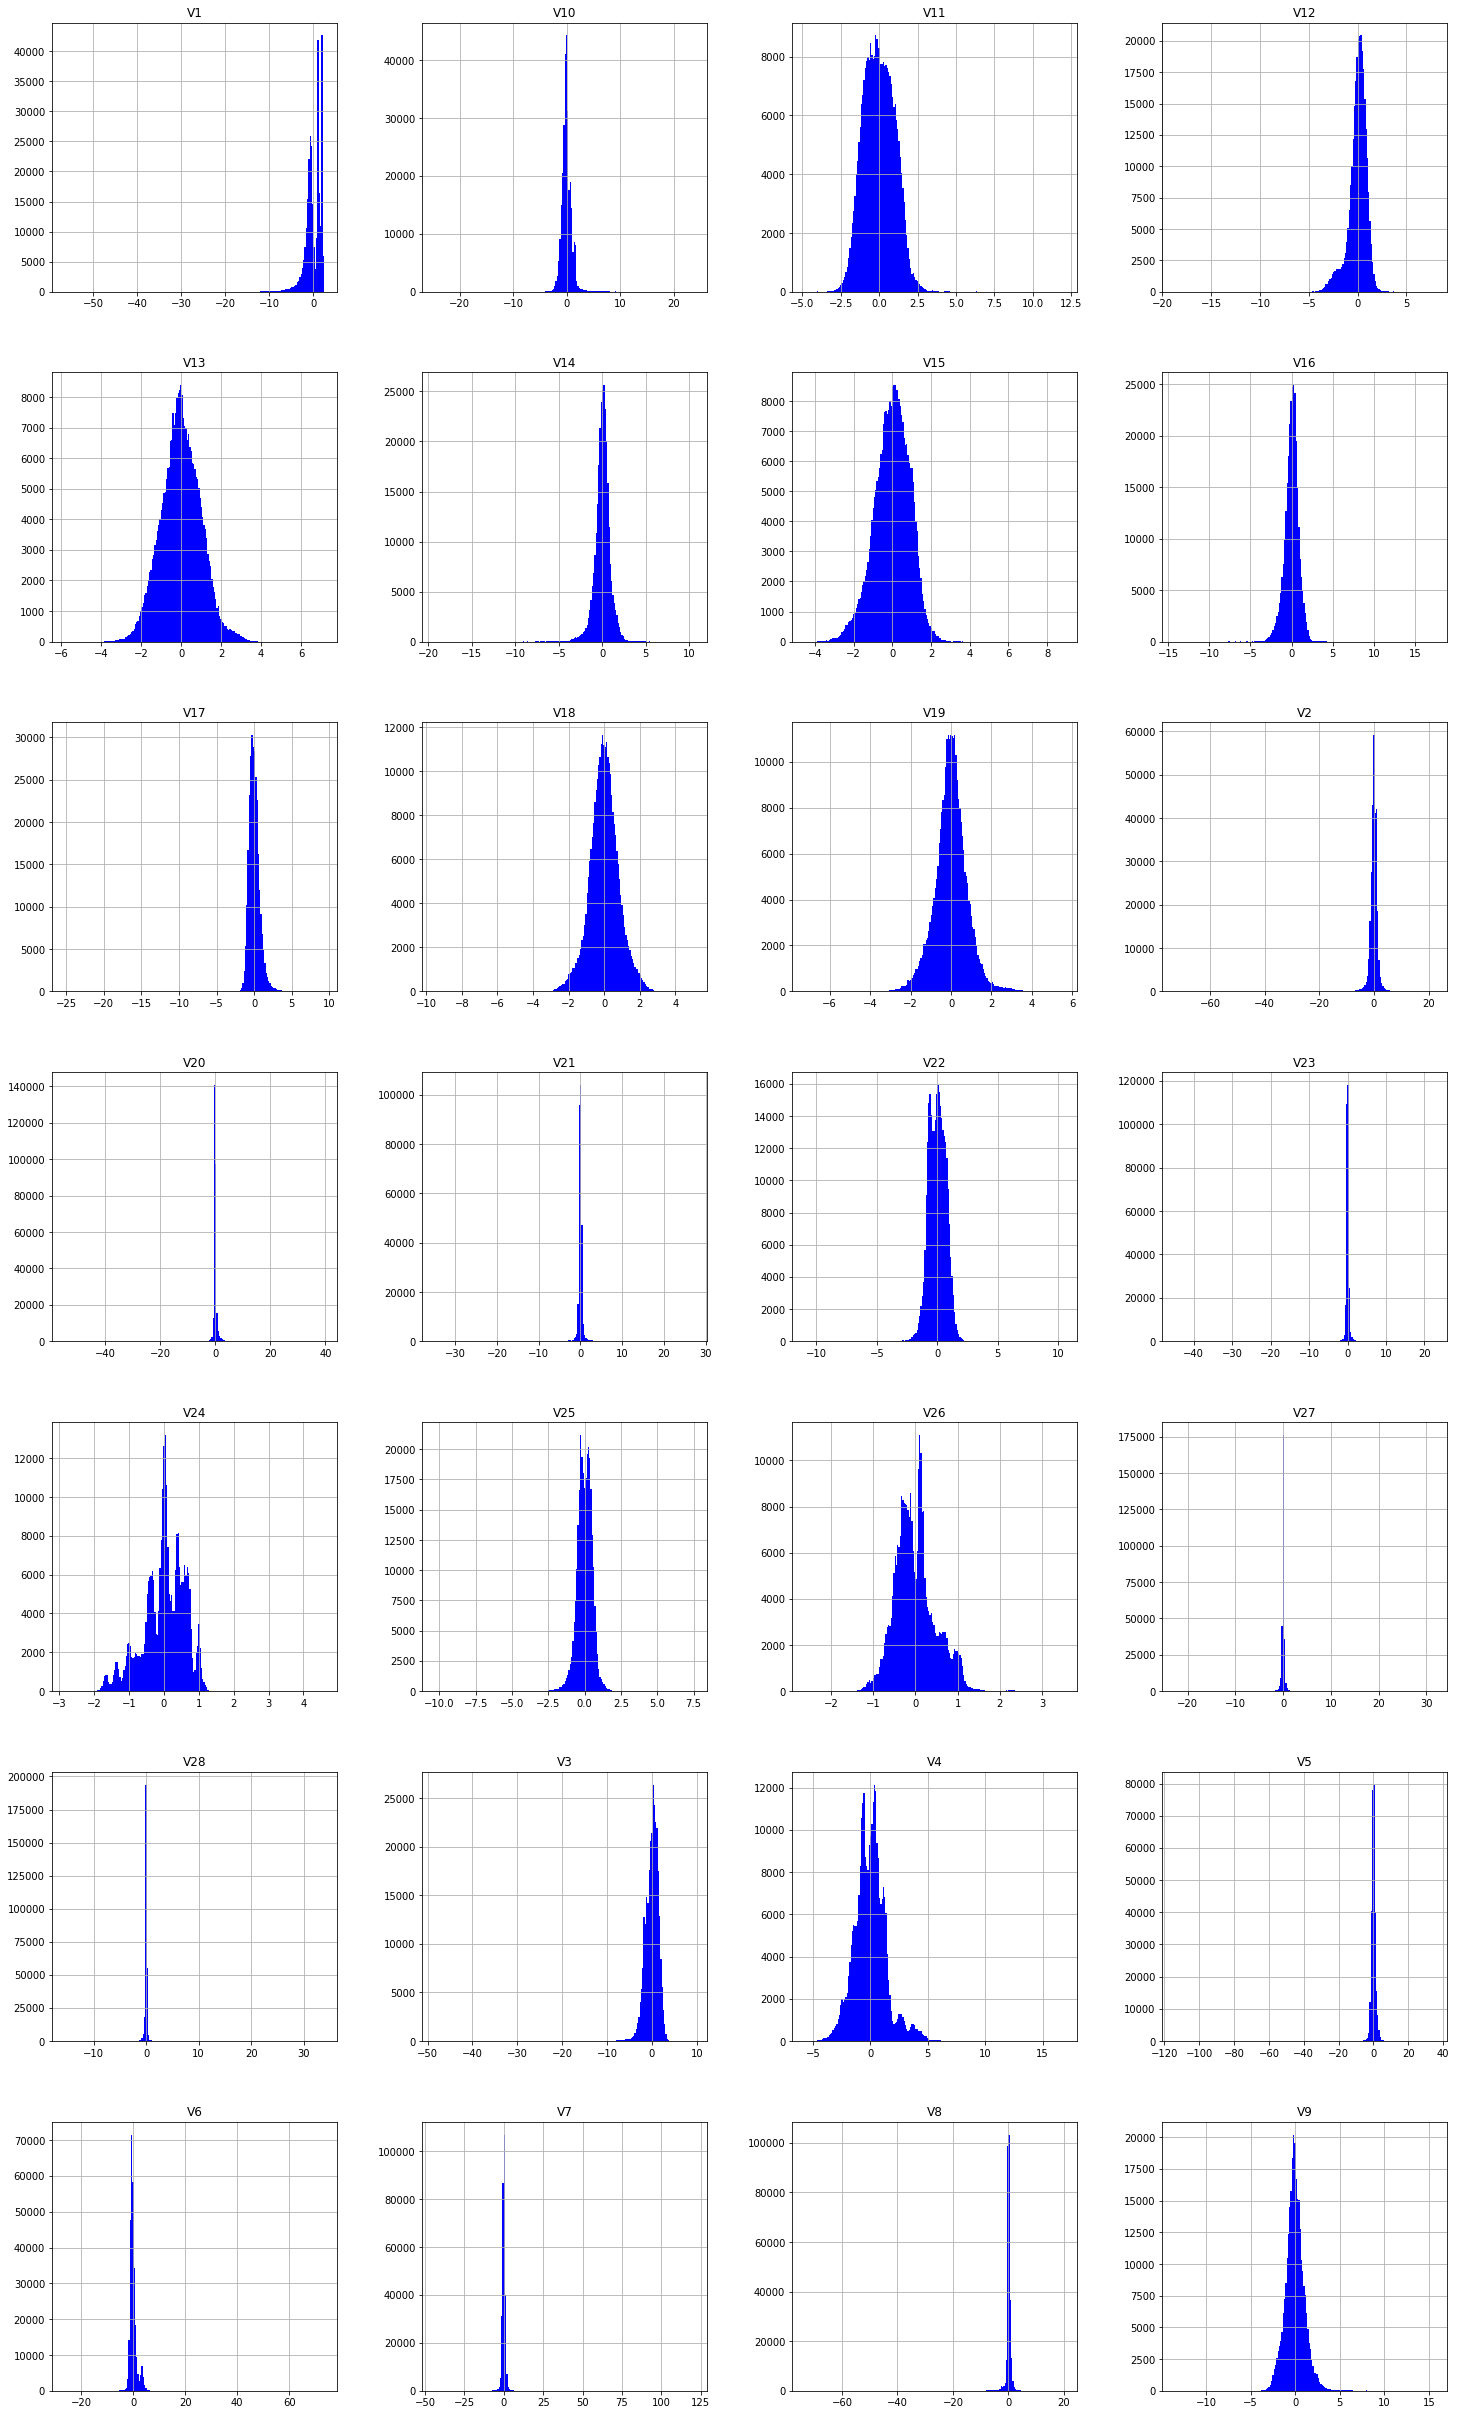

In [19]:
#Check the distribution of all the independent variables
data.drop(['Class','Amount','Time'],axis=1).hist(bins=200,color='blue',figsize=(25,50),layout=(8,4))
plt.show()

In [20]:
def plot_Outlier(var_list):
#Function to plot a list of categorical variables together
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(4,4,var_list.index(var)+1)
        ax=sns.boxplot(x = data[var])   
    plt.show()

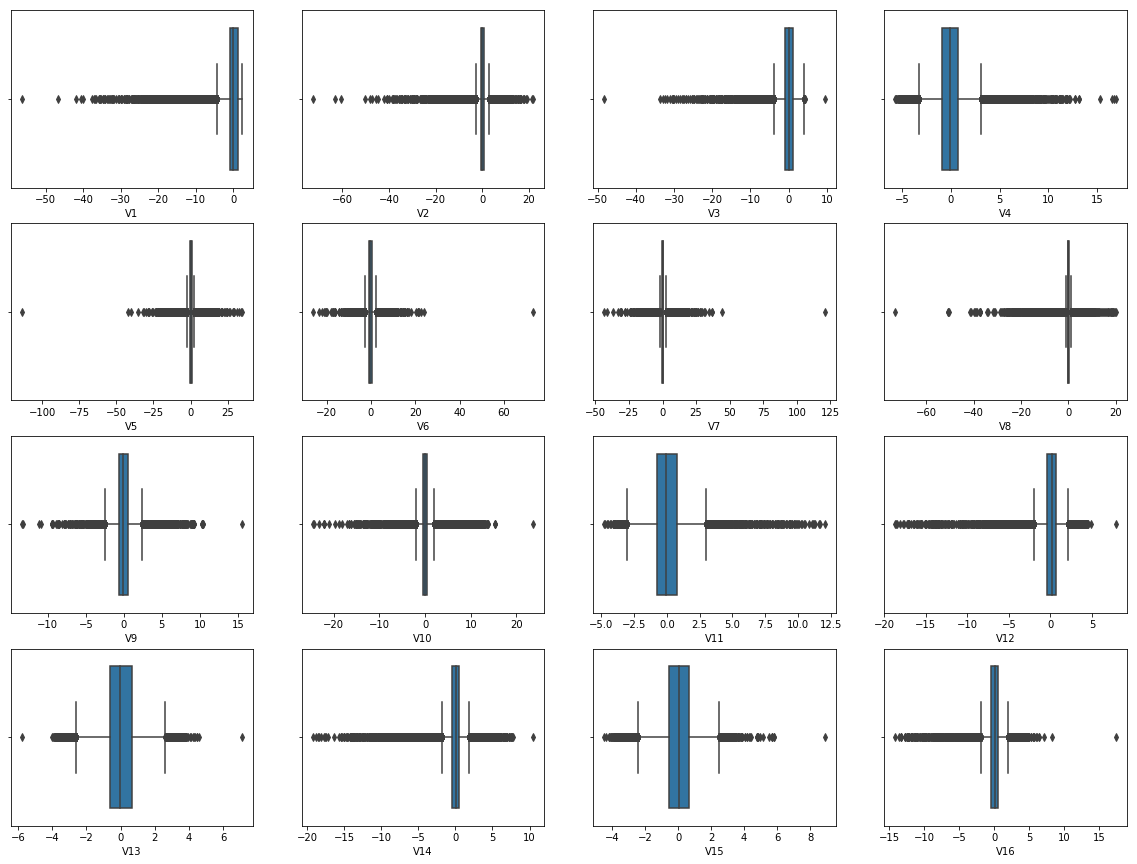

In [21]:
plot_Outlier(['V1','V2','V3','V4','V5',
              'V6','V7','V8','V9','V10','V11',
              'V12','V13','V14','V15','V16'])

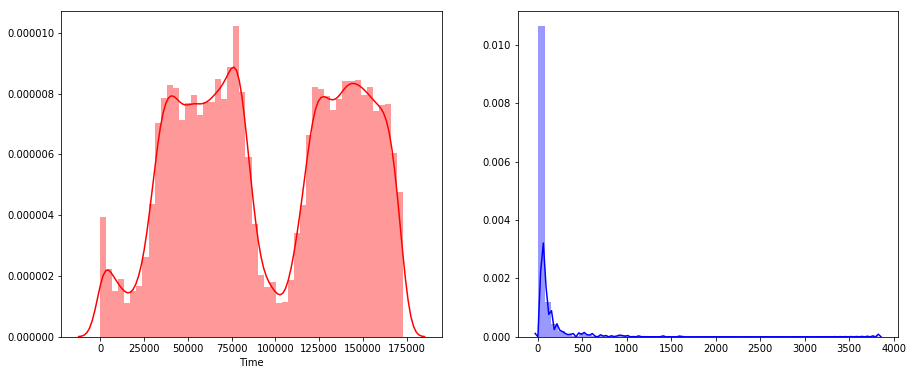

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(data['Time'],color='red')
plt.subplot(1,2,2)
sns.distplot(sorted(data['Amount'][0:1000]),color='blue')
plt.show()

In [23]:
skew_col=[i for i in data if i not in ['Class']]
skew_col

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

## Handeling Skewness in Dataset by applying yeo-johnson Trans

In [24]:
data_proc=data.copy()

pt = PowerTransformer(method='yeo-johnson')
dat = pt.fit_transform(data[skew_col])
# convert the array back to a dataframe
data_proc[skew_col] = pd.DataFrame(dat)

In [25]:
'''
def Outlier_treatment(col,data):
    print("Before Removing outliers",data.shape)
    for i in col:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        data=data.loc[(data[i] >= Q1 - 1.5*IQR) & (data[i] <= Q3 + 1.5*IQR)]
    print("After Removing outliers",data.shape)
    return data
'''




'\ndef Outlier_treatment(col,data):\n    print("Before Removing outliers",data.shape)\n    for i in col:\n        Q1 = data[i].quantile(0.25)\n        Q3 = data[i].quantile(0.75)\n        IQR = Q3 - Q1\n        data=data.loc[(data[i] >= Q1 - 1.5*IQR) & (data[i] <= Q3 + 1.5*IQR)]\n    print("After Removing outliers",data.shape)\n    return data\n'

In [26]:
'''
cols = [col for col in list(data_proc.describe().columns) if col not in ['Class']]
data_proc=Outlier_treatment(cols,data_proc)
'''

"\ncols = [col for col in list(data_proc.describe().columns) if col not in ['Class']]\ndata_proc=Outlier_treatment(cols,data_proc)\n"

In [27]:
X = data_proc.drop(['Class'], axis=1)

y = data_proc['Class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1,stratify=y)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (227845, 30)
Dimension of X_test: (56962, 30)


## Feature Scaling

In [29]:
scaler = StandardScaler()
X_train[['Amount','Time']] = scaler.fit_transform(X_train[['Amount','Time']])
X_test[['Amount','Time']] = scaler.transform(X_test[['Amount','Time']])

In [30]:
def CalculateMetrics(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("Sesitivity For the Model : ",(TP / float(TP+FN)))
    print("specificity For the Model : ",(TN / float(TN+FP)))
    print("false postive rate For the Model : ",(FP/ float(TN+FP)))
    print("precision/false postive rate For the Model : ",(TP / float(TP+FP)))
    print("Negative predictive value For the Model : ",(TN / float(TN+ FN)))  

In [31]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## Building Different Models In Unbalanced Dataset

### Logistic Regression

In [32]:
def parameter_tuning(model,params):
    folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

    # create gridsearch object
    model = RandomizedSearchCV(model, 
                               cv=folds, 
                               param_distributions=params, 
                               scoring='roc_auc', 
                               n_jobs=-1,
                                n_iter=1,
                               verbose=1)
    # Fit the grid search to the data
    model.fit(X_train, y_train)
    # printing the optimal accuracy score and hyperparameters
    print('We can get accuracy of',model.best_score_,'using',model.best_params_)

In [33]:
# Importing Logistic Regression from sklearn


logreg = LogisticRegression(random_state=1)

# training the regression model
logreg.fit(X_train, y_train)
# predicting for test set using the trained Logistic Regression model
y_pred = logreg.predict(X_test)

Sesitivity For the Model :  0.7244897959183674
specificity For the Model :  0.9998593134496342
false postive rate For the Model :  0.00014068655036578504
precision/false postive rate For the Model :  0.8987341772151899
Negative predictive value For the Model :  0.9995253414904277
Accuracy: 99.9386%
ROC AUC: 86.2175%


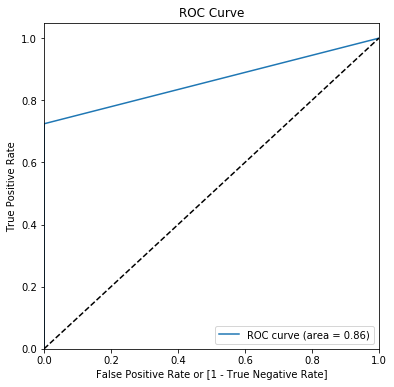

In [34]:
#y_pred = logreg.predict(X_test)
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_pred)
CalculateMetrics(confusion)
print("Accuracy: {:.4%}".format(accuracy_score(y_test, y_pred)))
print("ROC AUC: {:.4%}".format( roc_auc_score(y_test, y_pred)))

# ROC-AUC curve
draw_roc(y_test, y_pred)


### HyperParameter Tuning and K-fold Validation

In [35]:
params = {'C': [0.1, 0.5, 1, 2, 3]}
model=LogisticRegression(random_state=1)
parameter_tuning(model,params)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.9s finished


We can get accuracy of 0.9711982407005033 using {'C': 2}


In [36]:
# Importing Logistic Regression from sklearn
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=1)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = LogisticRegression(penalty= 'l2', C= 0.1,random_state=1)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 3
ROC AUC score: 0.8444225061842903
2 of KFold 3
ROC AUC score: 0.801765958454334
3 of KFold 3
ROC AUC score: 0.8261614775642749


### RandomForest Classifier

In [ ]:
randForest = RandomForestClassifier(random_state=0)

# training the RandomForestClassifier
randForest.fit(X_train, y_train)

# predicting labels for testing set
y_pred = randForest.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
CalculateMetrics(confusion)
print("Accuracy: {:.4%}".format(accuracy_score(y_test, y_pred)))
print("ROC AUC: {:.4%}".format( roc_auc_score(y_test, y_pred)))

# ROC-AUC curve
draw_roc(y_test, y_pred)

### HyperParameter Tuning and K-fold Validation

In [ ]:
hyperparam_combs = {
    'n_estimators':[100,200,300],
    'max_depth': [4, 6 ],
    'min_samples_split': [2, 10 ],
    'max_features': [0.2, 0.4, 0.6],
    'max_leaf_nodes': [8, 16, 32],
   
}
model=RandomForestClassifier(random_state=1)
parameter_tuning(model,hyperparam_combs)
# create 3 folds


In [ ]:
dt_params = {'n_estimators': 200, 
    'min_samples_split': 10,
 'max_leaf_nodes': 32,
 'max_features': 0.4,
 'max_depth': 4
             }
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=1)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = RandomForestClassifier(**dt_params)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

### K-Nearest Neighbour Model

In [ ]:

knn = KNeighborsClassifier(n_neighbors=3)

# training the RandomForestClassifier
knn.fit(X_train, y_train)

# predicting labels for testing set
y_pred = knn.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
CalculateMetrics(confusion)
print("Accuracy: {:.4%}".format(accuracy_score(y_test, y_pred)))
print("ROC AUC: {:.4%}".format( roc_auc_score(y_test, y_pred)))

# ROC-AUC curve
draw_roc(y_test, y_pred)

### HyperParameter Tuning and K-fold Validation

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10,2))
n_neighbors = [3,5]
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# create 3 folds
model=KNeighborsClassifier()
parameter_tuning(model,hyperparameters)


In [ ]:
dt_params = {'leaf_size': 3,
 'n_neighbors': 3,
 'p': 1
             }
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=1)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = KNeighborsClassifier(**dt_params)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

### Xgboost Classifier Model

Sesitivity For the Model :  0.8469387755102041
specificity For the Model :  0.9998944850872257
false postive rate For the Model :  0.00010551491277433877
precision/false postive rate For the Model :  0.9325842696629213
Negative predictive value For the Model :  0.9997362544616953
Accuracy: 99.9631%
ROC AUC: 92.3417%


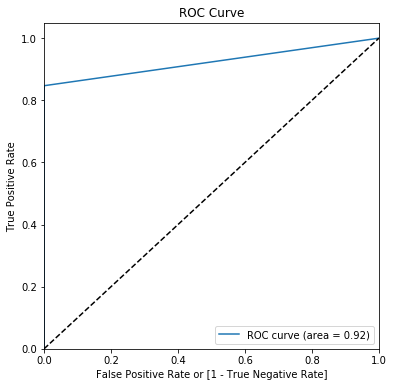

In [37]:

model = XGBClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
CalculateMetrics(confusion)
print("Accuracy: {:.4%}".format(accuracy_score(y_test, y_pred)))
print("ROC AUC: {:.4%}".format( roc_auc_score(y_test, y_pred)))

# ROC-AUC curve
draw_roc(y_test, y_pred)

### HyperParameter Tuning and K-fold Validation

In [38]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3, 4]
        }
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 1001)
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
random_search = RandomizedSearchCV(xgb,
                                   cv=skf, 
                                   param_distributions=params, 
                                   scoring='roc_auc', 
                                   n_jobs=-1, 
                                   verbose=3, 
                                   n_iter=1,
                                   random_state=1001 )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
search = random_search.fit(X_train,y_train)
#timer(start_time) # timing ends here for "start_time" variable
print('We can get accuracy of',search.best_score_,'using',search.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.3min finished


[12:27:36] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


We can get accuracy of 0.9809851798559642 using {'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 1, 'colsample_bytree': 0.8}


In [39]:
dt_params = {'min_child_weight':1 ,
             'n_estimators':200,
        'gamma': 1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'max_depth': 3
             }
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=1)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = XGBClassifier(**dt_params)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 3
ROC AUC score: 0.9115431592947593
2 of KFold 3
ROC AUC score: 0.8932663038275173
3 of KFold 3
ROC AUC score: 0.8840988585836307


### Support Vector Machine

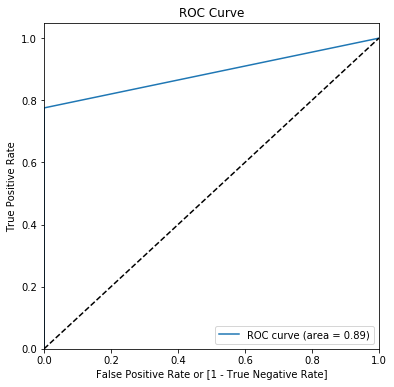

In [40]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=0)
svm_clf.fit(X_train, y_train) # We use an SVC with an RBF kernel
y_pred = svm_clf.predict(X_test)

# ROC-AUC curve
draw_roc(y_test, y_pred)


In [41]:
confusion = metrics.confusion_matrix(y_test, y_pred)
CalculateMetrics(confusion)
print("Accuracy: {:.4%}".format(accuracy_score(y_test, y_pred)))
print("ROC AUC: {:.4%}".format( roc_auc_score(y_test, y_pred)))

Sesitivity For the Model :  0.7755102040816326
specificity For the Model :  0.9998768992684299
false postive rate For the Model :  0.0001231007315700619
precision/false postive rate For the Model :  0.9156626506024096
Negative predictive value For the Model :  0.9996132140157176
Accuracy: 99.9491%
ROC AUC: 88.7694%


### HyperParameter Tuning and K-fold Validation

In [ ]:

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
clf = RandomizedSearchCV(SVC(),
                         param_distributions=param_distributions,
                         scoring='roc_auc',
                         random_state=1,
                         n_iter=1)

search = clf.fit(X_train,y_train)

search.best_params_

In [ ]:
dt_params = {"gamma":0.20 , "C":5.2 }
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=1)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = SVC(**dt_params)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

## Building Top Performing Models In Balanced Dataset

### Sampling the Unbalanced Data using SMOTE

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## Xgboost Classifier Balanced Model

In [ ]:
model = XGBClassifier(random_state=1)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
CalculateMetrics(confusion)
print("Accuracy: {:.4%}".format(accuracy_score(y_test, y_pred)))
print("ROC AUC: {:.4%}".format( roc_auc_score(y_test, y_pred)))

# ROC-AUC curve
draw_roc(y_test, y_pred)

## HyperParameter Tuning and K-fold Validation

In [ ]:
# A parameter grid for XGBoost
params = {
         'n_estimators':[200,300],
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3, 4]
        }
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 1001)
xgb = XGBClassifier(learning_rate=0.02, objective='binary:logistic',
                    silent=True, nthread=1)
random_search = RandomizedSearchCV(xgb,
                                   cv=skf, 
                                   param_distributions=params, 
                                   scoring='roc_auc', 
                                   n_jobs=-1, 
                                   verbose=3, 
                                   n_iter=1,
                                   random_state=1001 )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
search = random_search.fit(X_train,y_train)
#timer(start_time) # timing ends here for "start_time" variable
print('We can get accuracy of',search.best_score_,'using',search.best_params_)

In [ ]:
dt_params = {'min_child_weight':1 ,
             'n_estimators':300,
        'gamma': 0.5,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'max_depth': 3
             }
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=1)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = XGBClassifier(**dt_params)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

## Support Vector Machine For Balanced DataSet

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=0)
svm_clf.fit(X_train_smote, y_train_smote) # We use an SVC with an RBF kernel
y_pred = svm_clf.predict(X_test)

# ROC-AUC curve
draw_roc(y_test, y_pred)

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
CalculateMetrics(confusion)
print("Accuracy: {:.4%}".format(accuracy_score(y_test, y_pred)))
print("ROC AUC: {:.4%}".format( roc_auc_score(y_test, y_pred)))

## HyperParameter Tuning and K-fold Validation

In [ ]:

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
clf = RandomizedSearchCV(SVC(),
                         param_distributions=param_distributions,
                         scoring='roc_auc',
                         random_state=1,
                         n_iter=1)

search = clf.fit(X_train,y_train)

search.best_params_

In [ ]:
dt_params = {"gamma":0.02 , "C":5.2 }
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=1)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = SVC(**dt_params)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

## Print the class distribution after applying ADASYN

In [ ]:
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## Xgboost Classifier ADASYN Balanced Model

In [ ]:
model = XGBClassifier(random_state=1)
model.fit(X_train_adasyn, y_train_adasyn)
y_pred = model.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
CalculateMetrics(confusion)
print("Accuracy: {:.4%}".format(accuracy_score(y_test, y_pred)))
print("ROC AUC: {:.4%}".format( roc_auc_score(y_test, y_pred)))

# ROC-AUC curve
draw_roc(y_test, y_pred)

## HyperParameter Tuning and K-fold Validation

In [ ]:
# A parameter grid for XGBoost
params = {
         'n_estimators':[200,300],
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3, 4]
        }
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 1001)
xgb = XGBClassifier(learning_rate=0.02, objective='binary:logistic',
                    silent=True, nthread=1)
random_search = RandomizedSearchCV(xgb,
                                   cv=skf, 
                                   param_distributions=params, 
                                   scoring='roc_auc', 
                                   n_jobs=-1, 
                                   verbose=3, 
                                   n_iter=1,
                                   random_state=1001 )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
search = random_search.fit(X_train,y_train)
#timer(start_time) # timing ends here for "start_time" variable
print('We can get accuracy of',search.best_score_,'using',search.best_params_)

In [ ]:
dt_params = {'min_child_weight':1 ,
             'n_estimators':300,
        'gamma': 0.5,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'max_depth': 3
             }
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=1)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = XGBClassifier(**dt_params)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

## Support Vector Machine For ADASYN Balanced DataSet

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=0)
svm_clf.fit(X_train_adasyn, y_train_adasyn) # We use an SVC with an RBF kernel
y_pred = svm_clf.predict(X_test)

# ROC-AUC curve
draw_roc(y_test, y_pred)

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
CalculateMetrics(confusion)
print("Accuracy: {:.4%}".format(accuracy_score(y_test, y_pred)))
print("ROC AUC: {:.4%}".format( roc_auc_score(y_test, y_pred)))

## HyperParameter Tuning and K-fold Validation

In [ ]:

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
clf = RandomizedSearchCV(SVC(),
                         param_distributions=param_distributions,
                         scoring='roc_auc',
                         random_state=1,
                         n_iter=1)

search = clf.fit(X_train,y_train)

search.best_params_


In [ ]:
#print(search.feature_importances_)

In [ ]:
dt_params = {"gamma":0.02 , "C":5.2 }
kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=1)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = SVC(**dt_params)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

## Conclusion


We were able to accurately identify fraudulent credit card transactions using a random forest model. 
We found that the five variables most correlated with fraud are, 
in decreasing order, V17, V14, V10, V12, and V11. Only a few preprocessing steps were necessary before 
constructing predictive models:

Split the data using a random, stratified train/test split with a test size of 20%
Box-Cox power transform of the transaction amounts to remove skewness in the data
Mean and variance standardization of all features as part of a machine learning pipeline
We used the Matthews correlation coefficient (MCC) to compare the performance of different models. 
In cross validation, the best linear model ( linear SVC) achieved a cross-validated 
MCC score of 0.807, and a xgboostclassifier achieved a cross-validated MCC score of 0.856. 
We therefore chose the xgboostclassifier as the better model, which obtained an MCC of 0.869 on the test set.

To improve a chosen model, we searched over a grid of hyperparameters and compared performance with 
cross-validation. It may be possible to improve the random forest model by further tweaking the hyperparameters,
given additional time and/or computational power.